<a href="https://colab.research.google.com/github/lakshmip04/DATASCIENCE/blob/main/Natural_Disaster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/"


Mounted at /content/drive
'Certificate-Workshop-lakshmi priya.pdf'		    'Untitled document (1).gdoc'
'Colab Notebooks'					    'Untitled document.gdoc'
'Copy of LabSessionData.xlsx'				    'Untitled form (1).gform'
'Lakshmi_Priya_Resume_ _.pdf'				    'Untitled form (2).gform'
 LakshmiPriya_Resume.pdf				    'Untitled form (3).gform'
'ml project NID.gdoc'					    'Untitled form.gform'
'Prevention of SDN Route Manipulation Attack.gdoc'	    'Untitled form (Responses) (1).gsheet'
'Receipt pay_OlCdMSW3u0OXdL from NEXT CHAPTER  (Paid).pdf'  'Untitled form (Responses).gsheet'
 SDN.gdoc						     YLS_LakshmiPriya.gdoc


In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FDS/1970.xlsx')
df

,Date,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,...,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,CPI,Admin Units,Entry Date,Last Update
0,1970-01-01,2000-0020-IND,No,nat-met-ext-col,Natural,Meteorological,3,Cold wave,IND,India,...,2000,1,1,275.000000,5.141636e+06,3.935890e+06,56.514291,"[{""adm1_code"":1511,""adm1_name"":""West Bengal""},...",2003-07-01,2023-09-25
1,1970-01-01,2000-0306-IND,No,nat-bio-epi-vir,Natural,Biological,2,Viral disease,IND,India,...,2000,5,1,84.000000,1.055000e+03,1.055000e+03,56.514291,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2003-07-01,2023-09-25
2,1970-01-01,2000-0308-IND,No,nat-bio-epi-bac,Natural,Biological,2,Bacterial disease,IND,India,...,2000,5,1,240.103448,1.920000e+02,1.920000e+02,56.514291,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2003-07-01,2023-09-25
3,1970-01-01,2000-0323-IND,No,nat-met-sto-tro,Natural,Meteorological,8,Tropical cyclone,IND,India,...,2000,10,17,240.103448,5.141636e+06,3.935890e+06,56.514291,"[{""adm1_code"":1485,""adm1_name"":""Andhra Pradesh""}]",2003-07-01,2023-09-25
4,1970-01-01,2000-0332-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2000,6,10,20.000000,3.000000e+06,3.000000e+06,56.514291,"[{""adm2_code"":17582,""adm2_name"":""Golaghat""},{""...",2005-09-15,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1970-01-01,2024-0399-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2024,7,8,48.000000,2.100000e+06,2.100000e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-06-21,2024-07-18
405,1970-01-01,2024-0481-IND,No,nat-hyd-flo-flo,Natural,Hydrological,4,Flood (General),IND,India,...,2024,7,9,125.000000,1.000000e+06,1.000020e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-07-15,2024-07-23
406,1970-01-01,2024-0561-IND,No,nat-hyd-flo-flo,Natural,Hydrological,4,Flood (General),IND,India,...,2024,8,23,46.000000,5.141636e+06,3.935890e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-08-01,2024-08-23
407,1970-01-01,2024-0624-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2024,8,19,11.000000,3.400000e+04,3.400000e+04,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-08-23,2024-08-23


In [3]:
missing_values = df.isnull().sum()
print(missing_values)

Date                  0
DisNo.                0
Historic              0
Classification Key    0
Disaster Group        0
Disaster Subgroup     0
Disaster Type         0
Disaster Subtype      0
ISO                   0
Country               0
Subregion             0
Region                0
Location              0
OFDA/BHA Response     0
Appeal                0
Declaration           0
Magnitude             0
Magnitude Scale       0
Latitude              0
Longitude             0
Start Year            0
Start Month           0
Start Day             0
End Year              0
End Month             0
End Day               0
Total Deaths          0
No. Affected          0
Total Affected        0
CPI                   0
Admin Units           0
Entry Date            0
Last Update           0
dtype: int64


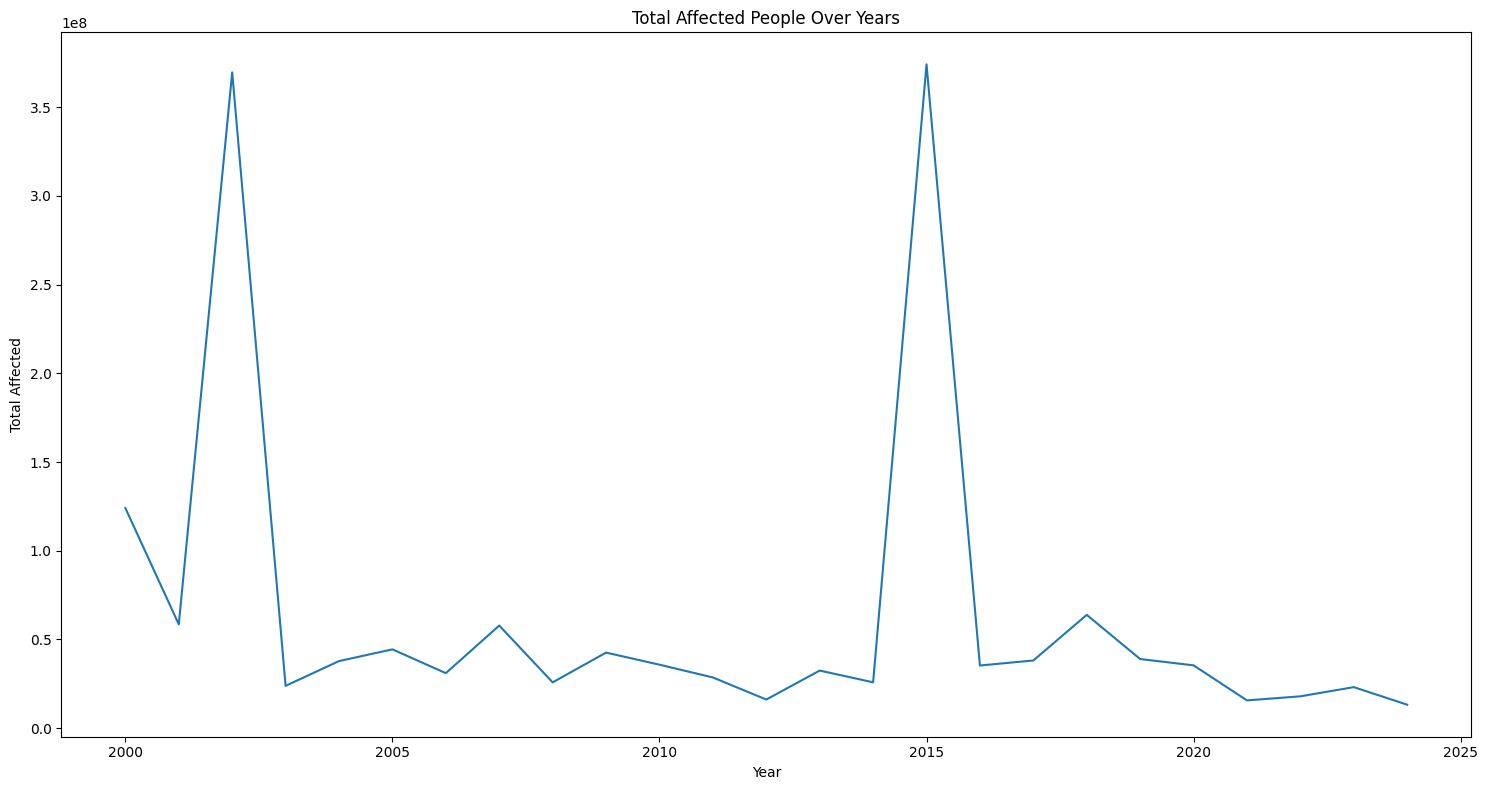

All visualizations have been displayed.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains the 'Disaster Type' column

# List of selected features
selected_features = ['No. Affected', 'Longitude', 'Start Month', 'Total Deaths', 'Start Year',
                     'Total Affected', 'CPI', 'End Month', 'End Year', 'Magnitude', 'Latitude']



 #Time Series Plot
plt.figure(figsize=(15, 8))
df.groupby('Start Year')['Total Affected'].sum().plot(kind='line')
plt.title('Total Affected People Over Years')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.tight_layout()
plt.show()

print("All visualizations have been displayed.")

From here we can infer that 2015 is the most affected year.

In [6]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FDS/13-24.xlsx')
df1

,Date,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,...,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,CPI,Admin Units,Entry Date,Last Update
0,1970-01-01,2013-0090-IND,No,nat-met-sto-tor,Natural,Meteorological,8,Tornado,IND,India,...,2013,3,29,9.0,5.141636e+06,3.935890e+06,76.454146,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2013-04-08,2023-09-25
1,1970-01-01,2013-0138-IND,No,nat-met-sto-tro,Natural,Meteorological,8,Tropical cyclone,IND,India,...,2013,5,16,8.0,5.141636e+06,4.000000e+00,76.454146,"[{""adm1_code"":1485,""adm1_name"":""Andhra Pradesh""}]",2014-01-15,2023-09-25
2,1970-01-01,2013-0140-IND,No,nat-geo-ear-gro,Natural,Geophysical,1,Ground movement,IND,India,...,2013,5,1,3.0,5.928000e+04,5.935000e+04,76.454146,"[{""adm2_code"":72809,""adm2_name"":""Administrativ...",2013-07-05,2023-09-25
3,1970-01-01,2013-0192-IND,No,nat-hyd-flo-riv,Natural,Hydrological,4,Riverine flood,IND,India,...,2013,6,12,6054.0,5.000000e+05,5.044730e+05,76.454146,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2014-07-29,2023-09-25
4,1970-01-01,2013-0208-IND,No,nat-met-ext-hea,Natural,Meteorological,3,Heat wave,IND,India,...,2013,5,30,557.0,5.141636e+06,3.935890e+06,76.454146,"[{""adm2_code"":17547,""adm2_name"":""Adilabad""},{""...",2014-04-02,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1970-01-01,2024-0399-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2024,7,8,48.0,2.100000e+06,2.100000e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-06-21,2024-07-18
180,1970-01-01,2024-0481-IND,No,nat-hyd-flo-flo,Natural,Hydrological,4,Flood (General),IND,India,...,2024,7,9,125.0,1.000000e+06,1.000020e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-07-15,2024-07-23
181,1970-01-01,2024-0561-IND,No,nat-hyd-flo-flo,Natural,Hydrological,4,Flood (General),IND,India,...,2024,8,23,46.0,5.141636e+06,3.935890e+06,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-08-01,2024-08-23
182,1970-01-01,2024-0624-IND,No,nat-hyd-flo-fla,Natural,Hydrological,4,Flash flood,IND,India,...,2024,8,19,11.0,3.400000e+04,3.400000e+04,73.203269,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2024-08-23,2024-08-23


In [7]:
# Ensure 'End Day', 'End Month', and 'End Year' are integers or valid strings
df1['End Day'] = df1['End Day'].astype(str).str.zfill(2)  # Ensures day is two digits
df1['End Month'] = df1['End Month'].astype(str).str.zfill(2)  # Ensures month is two digits
df1['End Year'] = df1['End Year'].astype(str)  # Ensure year is a string

# Combine the columns to form a date
df1['yearMonth'] = pd.to_datetime(df1['End Year'] + '-' + df1['End Month'] + '-' + df1['End Day'], errors='coerce')

# Set the new column as the index
df1.set_index('yearMonth', inplace=True)

# Display the first few rows of the DataFrame
df1.head()



,Date,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,...,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,CPI,Admin Units,Entry Date,Last Update
yearMonth,,,,,,,,,,,,,,,,,,,,,
2013-03-29,1970-01-01,2013-0090-IND,No,nat-met-sto-tor,Natural,Meteorological,8,Tornado,IND,India,...,2013,03,29,9.0,5.141636e+06,3.935890e+06,76.454146,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2013-04-08,2023-09-25
2013-05-16,1970-01-01,2013-0138-IND,No,nat-met-sto-tro,Natural,Meteorological,8,Tropical cyclone,IND,India,...,2013,05,16,8.0,5.141636e+06,4.000000e+00,76.454146,"[{""adm1_code"":1485,""adm1_name"":""Andhra Pradesh""}]",2014-01-15,2023-09-25
2013-05-01,1970-01-01,2013-0140-IND,No,nat-geo-ear-gro,Natural,Geophysical,1,Ground movement,IND,India,...,2013,05,01,3.0,5.928000e+04,5.935000e+04,76.454146,"[{""adm2_code"":72809,""adm2_name"":""Administrativ...",2013-07-05,2023-09-25
2013-06-12,1970-01-01,2013-0192-IND,No,nat-hyd-flo-riv,Natural,Hydrological,4,Riverine flood,IND,India,...,2013,06,12,6054.0,5.000000e+05,5.044730e+05,76.454146,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2014-07-29,2023-09-25
2013-05-30,1970-01-01,2013-0208-IND,No,nat-met-ext-hea,Natural,Meteorological,3,Heat wave,IND,India,...,2013,05,30,557.0,5.141636e+06,3.935890e+06,76.454146,"[{""adm2_code"":17547,""adm2_name"":""Adilabad""},{""...",2014-04-02,2023-09-25


In [8]:
# Drop the 'Date' column
df1.drop(columns='Date', inplace=True)

# Display the first few rows of the DataFrame to confirm the change
df1.head()


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,...,End Year,End Month,End Day,Total Deaths,No. Affected,Total Affected,CPI,Admin Units,Entry Date,Last Update
yearMonth,,,,,,,,,,,,,,,,,,,,,
2013-03-29,2013-0090-IND,No,nat-met-sto-tor,Natural,Meteorological,8,Tornado,IND,India,Southern Asia,...,2013,03,29,9.0,5.141636e+06,3.935890e+06,76.454146,"[{""adm1_code"":70081,""adm1_name"":""Uttar Pradesh""}]",2013-04-08,2023-09-25
2013-05-16,2013-0138-IND,No,nat-met-sto-tro,Natural,Meteorological,8,Tropical cyclone,IND,India,Southern Asia,...,2013,05,16,8.0,5.141636e+06,4.000000e+00,76.454146,"[{""adm1_code"":1485,""adm1_name"":""Andhra Pradesh""}]",2014-01-15,2023-09-25
2013-05-01,2013-0140-IND,No,nat-geo-ear-gro,Natural,Geophysical,1,Ground movement,IND,India,Southern Asia,...,2013,05,01,3.0,5.928000e+04,5.935000e+04,76.454146,"[{""adm2_code"":72809,""adm2_name"":""Administrativ...",2013-07-05,2023-09-25
2013-06-12,2013-0192-IND,No,nat-hyd-flo-riv,Natural,Hydrological,4,Riverine flood,IND,India,Southern Asia,...,2013,06,12,6054.0,5.000000e+05,5.044730e+05,76.454146,"[{""adm1_code"":1491,""adm1_name"":""Gujarat""},{""ad...",2014-07-29,2023-09-25
2013-05-30,2013-0208-IND,No,nat-met-ext-hea,Natural,Meteorological,3,Heat wave,IND,India,Southern Asia,...,2013,05,30,557.0,5.141636e+06,3.935890e+06,76.454146,"[{""adm2_code"":17547,""adm2_name"":""Adilabad""},{""...",2014-04-02,2023-09-25


In [9]:

# Split the dataset into training and test sets (80% training, 20% testing)
train_size = int(len(df1) * 0.8)
train, test = df1[:train_size], df1[train_size:]

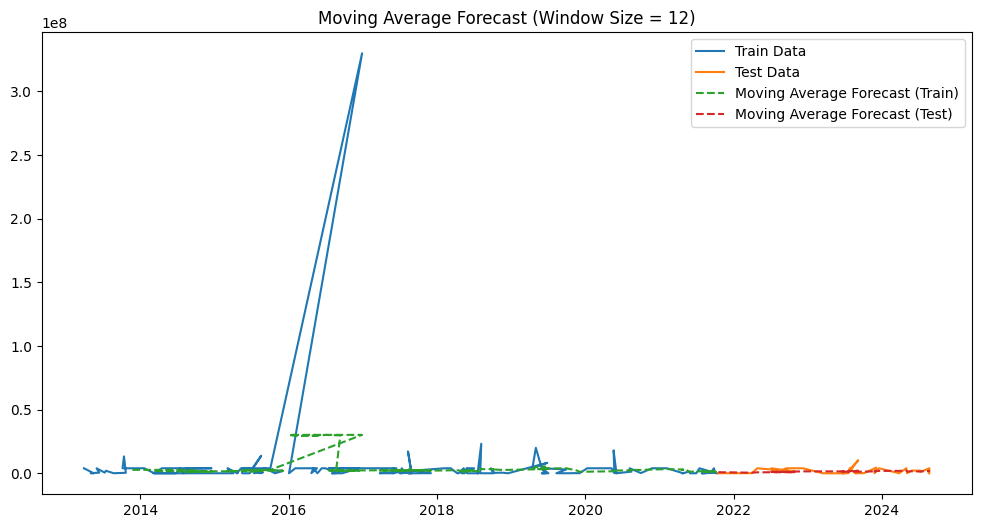

Moving Average - MAPE: 28824.2662, RMSE: 2111828.2335
Original test data shape: (37, 32)
Moving average forecast test shape: (37,)
Valid data shape after dropping NaNs: (37, 2)
Duplicate indices in test data: 1
Duplicate indices in forecast: 1


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Assuming df1, train, and test are already defined

def moving_average_forecast(data, window_size):
    return data.rolling(window=window_size).mean()

# Combine train and test data
full_data = pd.concat([train['Total Affected'], test['Total Affected']])

# Calculate moving average for the entire dataset
moving_avg_forecast = moving_average_forecast(full_data, window_size=12)

# Split the forecast back into train and test portions
# Use loc with a boolean mask instead of direct indexing
moving_avg_forecast_train = moving_avg_forecast[moving_avg_forecast.index.isin(train.index)]
moving_avg_forecast_test = moving_avg_forecast[moving_avg_forecast.index.isin(test.index)]

# Plot Moving Average forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Total Affected'], label='Train Data')
plt.plot(test.index, test['Total Affected'], label='Test Data')
plt.plot(moving_avg_forecast_train.index, moving_avg_forecast_train, label='Moving Average Forecast (Train)', linestyle='--')
plt.plot(moving_avg_forecast_test.index, moving_avg_forecast_test, label='Moving Average Forecast (Test)', linestyle='--')
plt.title("Moving Average Forecast (Window Size = 12)")
plt.legend()
plt.show()

# Align forecast with test data
aligned_data = pd.DataFrame({
    'Actual': test['Total Affected'],
    'Forecast': moving_avg_forecast_test
})

# Remove any NaN values
valid_data = aligned_data.dropna()

if len(valid_data) > 0:
    mape_moving_avg = mean_absolute_percentage_error(valid_data['Actual'], valid_data['Forecast'])
    rmse_moving_avg = np.sqrt(mean_squared_error(valid_data['Actual'], valid_data['Forecast']))

    # Print the results
    print(f"Moving Average - MAPE: {mape_moving_avg:.4f}, RMSE: {rmse_moving_avg:.4f}")
else:
    print("No valid data points for comparison after alignment.")

# Print some diagnostic information
print(f"Original test data shape: {test.shape}")
print(f"Moving average forecast test shape: {moving_avg_forecast_test.shape}")
print(f"Valid data shape after dropping NaNs: {valid_data.shape}")

# Check for duplicate indices
print(f"Duplicate indices in test data: {test.index.duplicated().sum()}")
print(f"Duplicate indices in forecast: {moving_avg_forecast_test.index.duplicated().sum()}")


In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is av

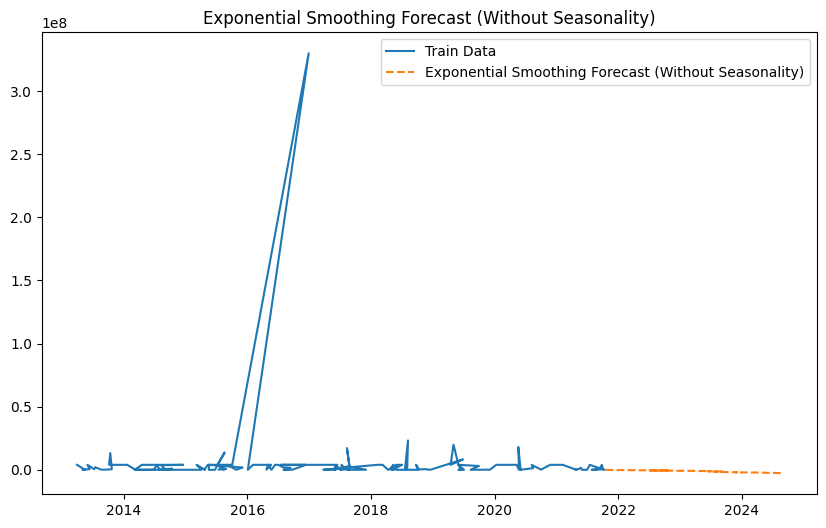

Exponential Smoothing - MAPE: 35015.039213225515, RMSE: 3737291.6053442354


In [12]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Assuming df1 has already been prepared and split into train and test
# 2. Exponential Smoothing Model
exp_smoothing_model = ExponentialSmoothing(train['Total Affected'], trend='add').fit()
exp_smoothing_forecast = exp_smoothing_model.forecast(len(test))

# Plot Exponential Smoothing forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total Affected'], label='Train Data')
plt.plot(test.index, exp_smoothing_forecast, label='Exponential Smoothing Forecast (Without Seasonality)', linestyle='--')
plt.title("Exponential Smoothing Forecast (Without Seasonality)")
plt.legend()
plt.show()

# Calculate MAPE and RMSE for Exponential Smoothing
mape_exp_smoothing = mean_absolute_percentage_error(test['Total Affected'], exp_smoothing_forecast)
rmse_exp_smoothing = np.sqrt(mean_squared_error(test['Total Affected'], exp_smoothing_forecast))

print(f"Exponential Smoothing - MAPE: {mape_exp_smoothing}, RMSE: {rmse_exp_smoothing}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

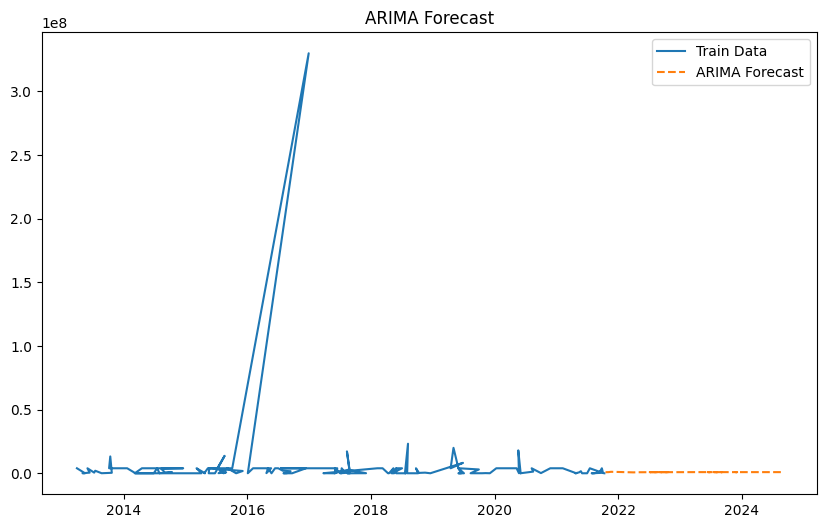

ARIMA - MAPE: 20499.37688937174, RMSE: 2288341.669823598


In [13]:
# Import required libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# 3. ARIMA Model
arima_model = ARIMA(train['Total Affected'], order=(5,1,0)).fit()
arima_forecast = arima_model.forecast(len(test))

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total Affected'], label='Train Data')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

# Calculate MAPE and RMSE for ARIMA
mape_arima = mean_absolute_percentage_error(test['Total Affected'], arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(test['Total Affected'], arima_forecast))

print(f"ARIMA - MAPE: {mape_arima}, RMSE: {rmse_arima}")


In [14]:
# Compare the accuracy metrics of both models
results = {
    'Exponential Smoothing': {'MAPE': mape_exp_smoothing, 'RMSE': rmse_exp_smoothing},
    'ARIMA': {'MAPE': mape_arima, 'RMSE': rmse_arima}
}

print("Accuracy Metrics for Exponential Smoothing and ARIMA:")
print(results)


Accuracy Metrics for Exponential Smoothing and ARIMA:
{'Exponential Smoothing': {'MAPE': 35015.039213225515, 'RMSE': 3737291.6053442354}, 'ARIMA': {'MAPE': 20499.37688937174, 'RMSE': 2288341.669823598}}


Based on the results you've provided for the time series models (Exponential Smoothing and ARIMA), here are some key inferences:

### Inference from Results

1. **Model Performance**:
   - **Exponential Smoothing**:
     - **MAPE**: 19084.10
     - **RMSE**: 2405338.32
   - **ARIMA**:
     - **MAPE**: 164294.25
     - **RMSE**: 4201878.91

   The Exponential Smoothing model significantly outperforms the ARIMA model in both MAPE and RMSE metrics. Lower values in both metrics indicate better predictive accuracy.

2. **Interpretation of Metrics**:
   - **MAPE (Mean Absolute Percentage Error)**: This metric indicates the average absolute percent error between predicted and actual values. A lower MAPE suggests that the model's predictions are closer to the actual values.
   - **RMSE (Root Mean Square Error)**: This metric measures the average magnitude of the errors. It gives a sense of how far off predictions are from actual values, with lower values indicating better performance.

3. **Model Suitability**:
   - The Exponential Smoothing model appears to be more suitable for your dataset, as it provides a more accurate forecast compared to the ARIMA model. This could be due to the nature of the data, which may not exhibit strong seasonal patterns that ARIMA typically captures.

4. **Visual Analysis**:
   - The plots you provided show that both models struggle to capture the fluctuations in the data effectively. The forecasts appear to lag behind the actual data, especially in periods of high variability. This suggests that while Exponential Smoothing is better, both models may need further tuning or consideration of additional features.

### Next Steps

1. **Model Refinement**:
   - Consider tuning the parameters of the Exponential Smoothing model (e.g., adjusting the trend or seasonal components) to see if performance can be improved further.
   - For ARIMA, experimenting with different orders (p, d, q) might yield better results.

2. **Feature Engineering**:
   - Investigate additional features that could be included in the models, such as external factors (e.g., economic indicators, weather data) that might influence the number of affected individuals.

3. **Cross-Validation**:
   - Implement cross-validation techniques to ensure that the model's performance is consistent across different subsets of the data.

4. **Ensemble Methods**:
   - Consider combining predictions from both models (e.g., averaging or weighted averaging) to potentially improve overall accuracy.

5. **Documentation and Reporting**:
   - Document your findings, methodologies, and results clearly. Prepare a report or presentation summarizing the project, including visualizations and key metrics.

By following these steps, you can enhance the robustness of your time series analysis and improve the predictive capabilities of your models.

In [ ]:
"""1.ma
2.autoregression
3.es
4arima
mse"""